## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/data1.csv")
df.head()

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
df.drop(columns=['ISE.1','SP','DAX','FTSE','NIKKEI','BOVESPA','EU','EM'],inplace=True)
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index('date',inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')
df.head()

,ISE
date,
2009-01-05,0.035754
2009-01-06,0.025426
2009-01-07,-0.028862
2009-01-08,-0.062208
2009-01-09,0.009860


In [ ]:
df1 = df[len(df)-51:]
df1.head()

,ISE
date,
2010-12-14,0.001946
2010-12-15,-0.015310
2010-12-16,-0.016467
2010-12-17,-0.014151
2010-12-20,-0.000356


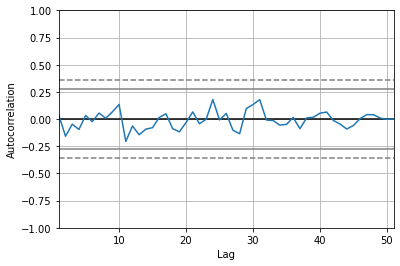

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1.ISE)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

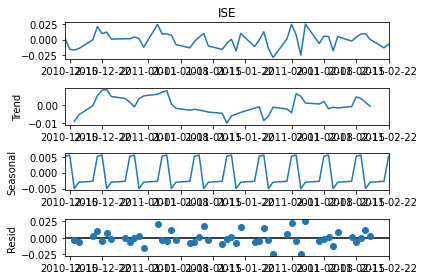

In [ ]:
s_dec_additive = seasonal_decompose(x=df1.ISE,model='additive')
s_dec_additive.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def ad_fuller_test(sales):
  results = adfuller(sales)
  labels = ['Test Statistic','p-value','Number of lags used','Number of Observations','Critical Value']
  for values, labels in zip(results,labels):
    print(labels,' : ',str(values))

In [ ]:
ad_fuller_test(df1.ISE)

Test Statistic  :  -5.548980726405822
p-value  :  1.6361529686112986e-06
Number of lags used  :  1
Number of Observations  :  49
Critical Value  :  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}


In [ ]:
df1['ISE'] = df1['ISE'].diff()
df1 = df1.drop(df1.index[0])
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ISE
date,
2010-12-15,-0.017256
2010-12-16,-0.001157
2010-12-17,0.002316
2010-12-20,0.013795
2010-12-21,0.020900


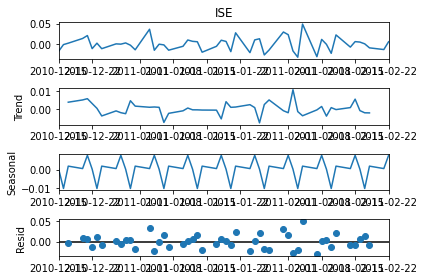

In [ ]:
s_dec_additive1 = seasonal_decompose(x=df1.ISE,model='additive')
s_dec_additive1.plot()
plt.show()

In [ ]:
ad_fuller_test(df1.ISE)

Test Statistic  :  -6.027215708959613
p-value  :  1.4463061254434532e-07
Number of lags used  :  3
Number of Observations  :  46
Critical Value  :  {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


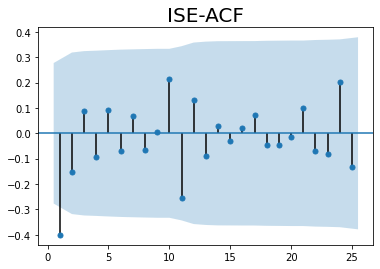

In [ ]:
sm.graphics.tsa.plot_acf(df1.ISE,lags=25,zero=False)
plt.title('ISE-ACF',size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


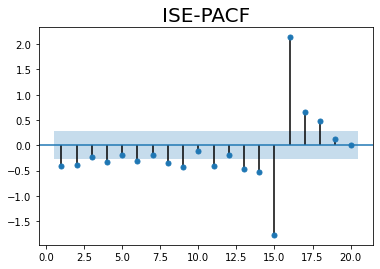

In [ ]:
sm.graphics.tsa.plot_pacf(df1.ISE,lags=20,zero=False)
plt.title('ISE-PACF',size=20)
plt.show()

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima
best_fit = auto_arima(df1['ISE'],trace=True)
best_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-283.734, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-262.350, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-269.153, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-264.344, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-285.621, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-284.585, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-283.097, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-284.841, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-286.227, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-274.810, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-282.519, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-275.224, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 148.113
Date:                Mon, 19 Jul 2021   AIC                           -286.227
Time:                        15:01:06   BIC                           -276.667
Sample:                             0   HQIC                          -282.586
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.319e-05      0.000     -0.200      0.841      -0.000       0.000
ar.L1          0.0602      0.150      0.402      0.688      -0.233       0.353
ar.L2         -0.1443      0.148     -0.974      0.330      -0.435       0.146
ma.L1         -0.9841      0.367     -2.683      0.007      -1.703      -0.265
sigma2         0.0001   5.35e-05      2.721      0.007    4.07e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.89   Prob(JB):                         0.76
Heteroskedasticity (H):               1.19   Skew:                             0.17
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
n = len(df1)
p = round(n*0.80)
train_data = df1.iloc[:p]
test_data = df1.iloc[p:]
print(len(train_data),len(test_data))

40 10


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = ARIMA(train_data['ISE'],order=(2,1,1))
model_ISE=model.fit()
model_ISE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.ISE   No. Observations:                   39
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 105.090
Method:                       css-mle   S.D. of innovations              0.015
Date:                Mon, 19 Jul 2021   AIC                           -200.179
Time:                        15:01:13   BIC                           -191.861
Sample:                    12-16-2010   HQIC                          -197.195
                         - 02-08-2011                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.417e-07      0.000      0.006      0.995      -0.000       0.000
ar.L1.D.ISE    -0.5392      0.149     -3.616      0.000      -0.832      -0.247
ar.L2.D.ISE    -0.3805      0.151     -2.514      0.012      -0.677      -0.084
ma.L1.D.ISE    -1.0000      0.071    -14.120      0.000      -1.139      -0.861
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7085           -1.4581j            1.6211           -0.3220
AR.2           -0.7085           +1.4581j            1.6211            0.3220
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
df['auto_arima_ISE']=model_ISE.predict(start=len(train_data),end=556,dynamic=True)

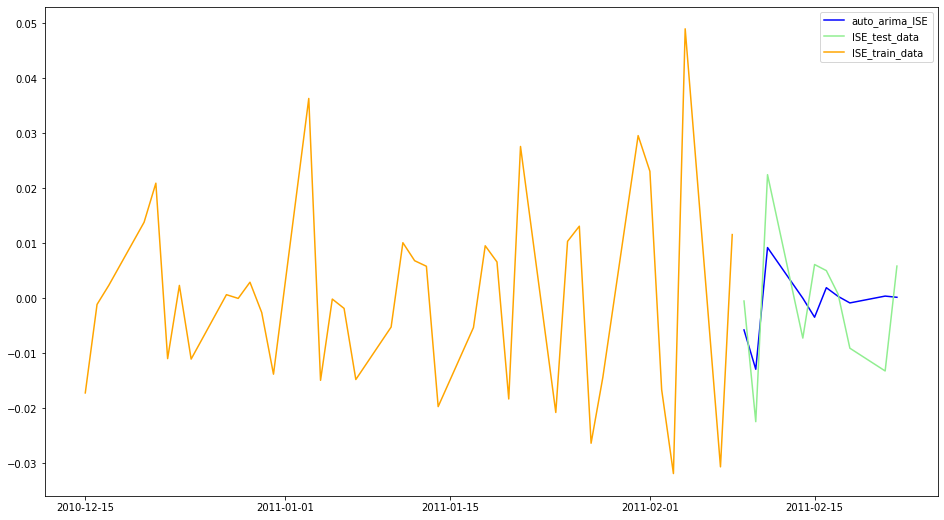

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(df['auto_arima_ISE'],color='blue')
plt.plot(test_data['ISE'],color='lightgreen')
plt.plot(train_data['ISE'],color='orange')
plt.legend(['auto_arima_ISE','ISE_test_data','ISE_train_data'])

In [ ]:
model=sm.tsa.statespace.SARIMAX(df1['ISE'],order=(2, 0, 1),seasonal_order=(2,0,1,7))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               ISE   No. Observations:                   50
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 7)   Log Likelihood                 147.247
Date:                           Mon, 19 Jul 2021   AIC                           -280.495
Time:                                   15:01:18   BIC                           -267.111
Sample:                               12-15-2010   HQIC                          -275.398
                                    - 02-22-2011                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0365      0.144     -0.253      0.800      -0.319       0.246
ar.L2         -0.2339      0.134     -1.743      0.081      -0.497       0.029
ma.L1         -0.8560      0.178     -4.815      0.000      -1.204      -0.508
ar.S.L7        0.1399      1.114      0.126      0.900      -2.044       2.324
ar.S.L14      -0.2161      0.179     -1.204      0.228      -0.568       0.136
ma.S.L7       -0.0628      1.033     -0.061      0.952      -2.088       1.962
sigma2         0.0001   3.56e-05      4.074      0.000    7.54e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.78   Prob(JB):                         0.62
Heteroskedasticity (H):               1.10   Skew:                             0.20
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df1['ISE_res']=results.predict(start=len(train_data),end=556,dynamic=True)

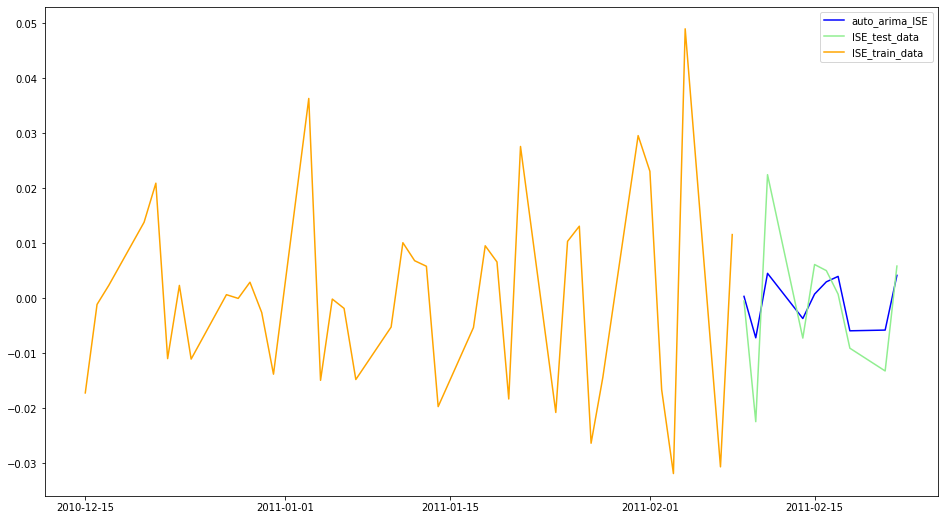

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(df1['ISE_res'],color='blue')
plt.plot(test_data['ISE'],color='lightgreen')
plt.plot(train_data['ISE'],color='orange')
plt.legend(['auto_arima_ISE','ISE_test_data','ISE_train_data'])